In [1]:
# Paso 1: Cargar el dataset y eliminar valores nulos y duplicados

# Importamos las bibliotecas necesarias
import pandas as pd
import numpy as np

# Cargamos el dataset titanic.csv
df = pd.read_csv('titanic.csv')

# Guardamos el número inicial de filas
initial_rows = df.shape[0]

#para ver cuantos habria que eliminar si descartamos primero las columnas no importantes
#df.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'], inplace=True)

# Eliminamos duplicados
df.drop_duplicates(inplace=True)

# Eliminamos valores nulos
df.dropna(inplace=True)

# Guardamos el número de filas después de eliminar duplicados y valores nulos
final_rows = df.shape[0]

# Filas eliminadas
deleted_rows = initial_rows - final_rows
print(f'Se han eliminado {deleted_rows} filas.')

# Reseteamos los índices
df.reset_index(drop=True, inplace=True)


#Pregunta: ¿En qué beneficia la eliminación de valores nulos y duplicados?

#Respuesta: La eliminación de valores nulos y duplicados nos ayuda a evitar información incorrecta, 
#           inconsistente o incompleta, lo que puede mejorar la calidad del análisis y de los modelos predictivos al evitar sesgos y sobreajustes.

Se han eliminado 708 filas.


In [2]:
# Paso 2: Determinar si hay algún atributo que no sea útil

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183 entries, 0 to 182
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  183 non-null    int64  
 1   Survived     183 non-null    int64  
 2   Pclass       183 non-null    int64  
 3   Name         183 non-null    object 
 4   Sex          183 non-null    object 
 5   Age          183 non-null    float64
 6   SibSp        183 non-null    int64  
 7   Parch        183 non-null    int64  
 8   Ticket       183 non-null    object 
 9   Fare         183 non-null    float64
 10  Cabin        183 non-null    object 
 11  Embarked     183 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 17.3+ KB


In [3]:
#Lista de posibles atributos que no nos van a resultar muy utiles

# 1. PassengerId: Porque es solo un identificador único para cada pasajero. No tiene un impacto directo en el análisis, ya que no 
#                 aporta ninguna información útil para el aprendizaje automático.

# 2. Name: Aunque contiene información valiosa como los nombres de los pasajeros, para la mayoría de los modelos de aprendizaje automático 
#          no será útil, a menos que queramos extraer características específicas (como títulos: Mr., Mrs., etc.). 

# 3. Ticket: El número de ticket es único para cada pasajero o grupo de pasajeros y probablemente no contenga patrones útiles para el modelo. 
#            A menos que queramos realizar algún análisis específico con los tickets, lo podríamos eliminar.

# 4. Cabin: Aunque puede parecer interesante, la columna Cabin tiene muchos valores nulos en el dataset original del Titanic (antes de eliminarlos). 
#           Además, los números de cabina pueden no ser particularmente útiles para predecir la supervivencia.

In [4]:
# Si decidieramos eliminar las columnas de antes, descomentar la siguiente linea
# df.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'], inplace=True)

# Verificamos el dataframe después de la eliminación
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
1,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
2,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
3,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
4,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S


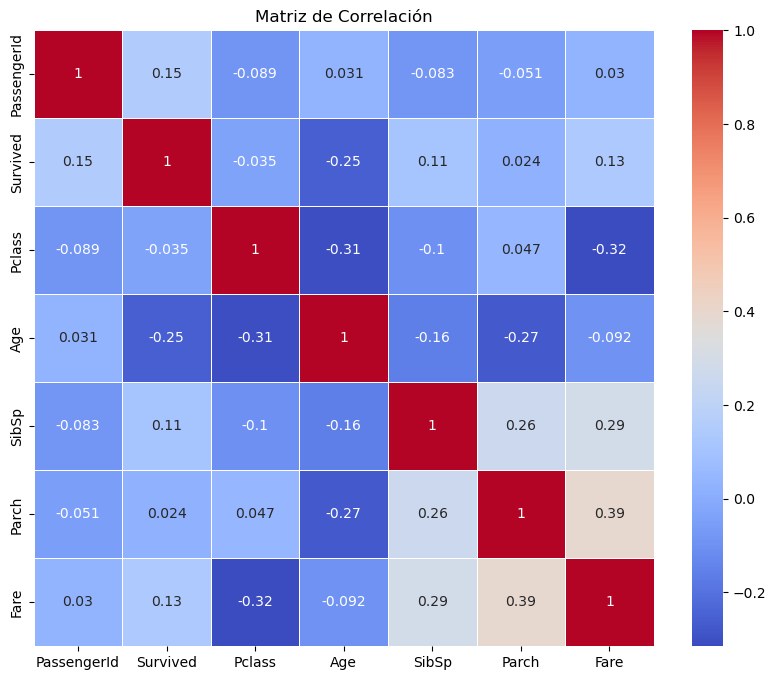

In [5]:
# Paso 3: Relaciones entre atributos (diagramas de dispersión y correlación)

import seaborn as sns
import matplotlib.pyplot as plt

#from sklearn.preprocessing import LabelEncoder

# Usamos LabelEncoder para convertir 'Sex' en numérico (0 y 1)
#label_encoder = LabelEncoder()
#df['Sex'] = label_encoder.fit_transform(df['Sex'])

# Usamos pd.get_dummies() para convertir 'Embarked' en variables dummy
#df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)

#correlation_matrix = df.corr()

#Descomentar hasta aqui si queremos convertir Sex y Embarked para que puedan ser procesados tambien


# Seleccionamos solo las columnas numéricas
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Calculamos la correlación entre estas columnas numéricas
correlation_matrix = df[numerical_columns].corr()

# Dibujamos un heatmap para visualizar las correlaciones
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matriz de Correlación')
plt.show()

In [6]:
#Lo mas relacionado en esta matriz de Correlación 
# Fare y Pclass -> esto se debe a que cuando más sube la clase 1(primera) -> 3(tercera) el precio del billete baja
# Age y survived -> se puede atribuir al tender a salvar niños antes que a señores mayores y que los jovenes suelen tenter mas resistencia 
# Fare y Parch // Fare y sibSp -> indica que con familias mas grandes suelen tener que pagar mas por sus billetes ya sea por si hay q comprar billetes individuales o comprar un camarote mejor
# Age y Pclass -> muestra que la gente mas joven son los que suelen tener menos poder adquisitivos para comprar un camarote en mejor clase

In [7]:
# Paso 4: Descripción estadística de los atributos numéricos

numerical_description = df.describe()
print(numerical_description)

       PassengerId    Survived      Pclass         Age       SibSp  \
count   183.000000  183.000000  183.000000  183.000000  183.000000   
mean    455.366120    0.672131    1.191257   35.674426    0.464481   
std     247.052476    0.470725    0.515187   15.643866    0.644159   
min       2.000000    0.000000    1.000000    0.920000    0.000000   
25%     263.500000    0.000000    1.000000   24.000000    0.000000   
50%     457.000000    1.000000    1.000000   36.000000    0.000000   
75%     676.000000    1.000000    1.000000   47.500000    1.000000   
max     890.000000    1.000000    3.000000   80.000000    3.000000   

            Parch        Fare  
count  183.000000  183.000000  
mean     0.475410   78.682469  
std      0.754617   76.347843  
min      0.000000    0.000000  
25%      0.000000   29.700000  
50%      0.000000   57.000000  
75%      1.000000   90.000000  
max      4.000000  512.329200  


In [8]:
#count: Cantidad de observaciones no nulas.
#mean: Media aritmética.
#std: Desviación estándar.
#min: Valor mínimo.
#25%: Primer cuartil (el 25% de los datos están por debajo de este valor).
#50% (mediana): Segundo cuartil (el 50% de los datos están por debajo de este valor).
#75%: Tercer cuartil (el 75% de los datos están por debajo de este valor).
#max: Valor máximo.


# Descripción de cada variable:

# 1. PassengerId:
# count: 183 pasajeros.
# mean: La media de los identificadores de los pasajeros es aproximadamente 455.37.
# std: Desviación estándar es 247.05, alta porque los IDs son únicos.
# min: El valor mínimo es 2.
# 25%: El 25% de los pasajeros tiene un identificador menor a 263.5.
# 50% (mediana): La mediana es 457.
# 75%: El 75% tiene un ID menor a 676.
# max: El valor máximo es 890.

# 2. Survived (Supervivencia):
# count: 183 pasajeros.
# mean: El 67.2% de los pasajeros sobrevivió (0.672).
# std: La desviación estándar es 0.471, valores binarios (0 o 1).
# min: El valor mínimo es 0, indicando que algunos pasajeros no sobrevivieron.
# 25%: El 25% no sobrevivió (valor 0).
# 50% (mediana): Más del 50% sobrevivió (mediana de 1).
# 75%: El 75% sobrevivió.
# max: El valor máximo es 1, indicando supervivencia.

# 3. Pclass (Clase de billete):
# count: 183 pasajeros.
# mean: 1.19, la mayoría de los pasajeros viajaba en primera clase.
# std: Desviación estándar de 0.515, leves diferencias en la clase de los billetes.
# min: El valor mínimo es 1, algunos pasajeros viajaban en primera clase.
# 25%: El 25% de los pasajeros viajaba en primera clase.
# 50% (mediana): La mayoría viajaba en primera clase (mediana 1).
# 75%: El 75% también viajaba en primera clase.
# max: El valor máximo es 3, indicando que algunos pasajeros viajaban en tercera clase.

# 4. Age (Edad):
# count: 183 pasajeros.
# mean: Edad promedio de 35.67 años.
# std: Desviación estándar de 15.64, indicando gran variabilidad en las edades.
# min: La edad mínima es 0.92 años (bebé de menos de 1 año).
# 25%: El 25% de los pasajeros tiene menos de 24 años.
# 50% (mediana): Edad mediana es 36 años.
# 75%: El 75% tiene menos de 47.5 años.
# max: La edad máxima es 80 años.

# 5. SibSp (Número de hermanos/cónyuges a bordo):
# count: 183 pasajeros.
# mean: Promedio de 0.46 hermanos o cónyuges a bordo.
# std: Desviación estándar de 0.64, indicando variación en los acompañantes.
# min: El valor mínimo es 0, pasajeros sin hermanos o cónyuge.
# 25%: El 25% no tenía acompañantes familiares.
# 50% (mediana): La mediana es 0, indicando que más del 50% viajaba sin acompañantes familiares.
# 75%: El 75% viajaba con 1 o menos acompañantes.
# max: El valor máximo es 3 acompañantes familiares.

# 6. Parch (Número de padres/hijos a bordo):
# count: 183 pasajeros.
# mean: Promedio de 0.47 padres o hijos a bordo.
# std: Desviación estándar de 0.75, indicando variación en los acompañantes familiares.
# min: El valor mínimo es 0, algunos pasajeros no viajaban con padres o hijos.
# 25%: El 25% de los pasajeros viajaba sin padres o hijos.
# 50% (mediana): La mediana es 0, indicando que más del 50% no viajaba con padres o hijos.
# 75%: El 75% viajaba con 1 o menos padres/hijos.
# max: El valor máximo es 4 acompañantes familiares.

# 7. Fare (Tarifa):
# count: 183 pasajeros.
# mean: Tarifa promedio es 78.68 unidades monetarias.
# std: Desviación estándar alta de 76.35, indicando gran variabilidad en las tarifas pagadas.
# min: El valor mínimo es 0, algunos pasajeros no pagaron tarifa.
# 25%: El 25% pagó menos de 29.7.
# 50% (mediana): La tarifa mediana es 57.
# 75%: El 75% pagó menos de 90 unidades.
# max: El valor máximo es 512.33 unidades monetarias.

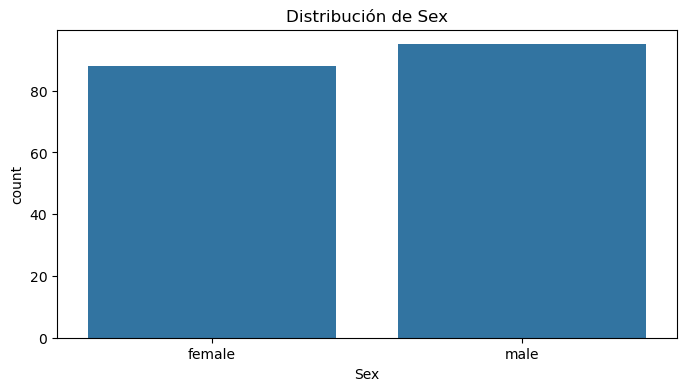

Valor más frecuente de Sex: male


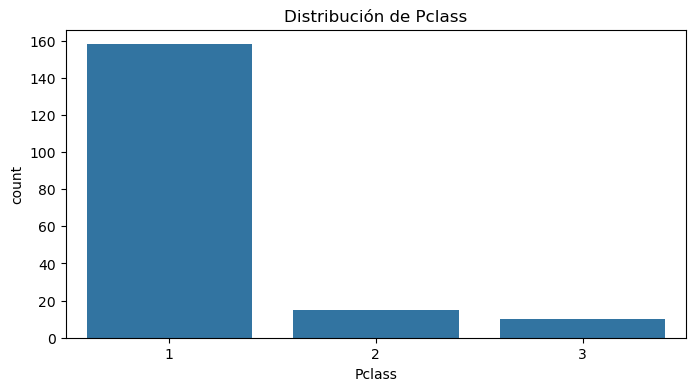

Valor más frecuente de Pclass: 1


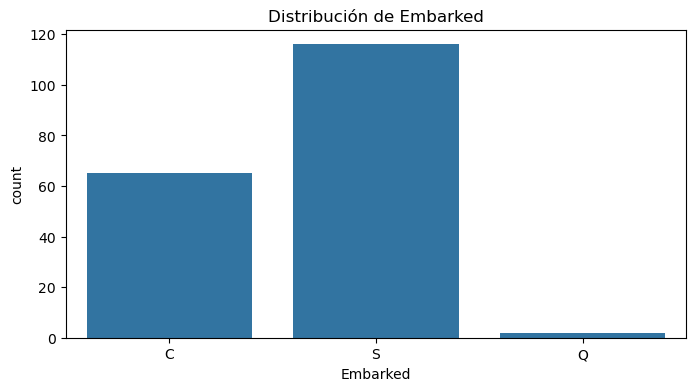

Valor más frecuente de Embarked: S


In [9]:
# Paso 5: Análisis de atributos categóricos

# Gráfico de barras para los atributos categóricos
categorical_columns = ['Sex', 'Pclass', 'Embarked']

for column in categorical_columns:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df, x=column)
    plt.title(f'Distribución de {column}')
    plt.show()

    # Frecuencia del valor más común
    most_frequent_value = df[column].mode()[0]
    print(f'Valor más frecuente de {column}: {most_frequent_value}')


In [10]:
# El atributo Sex está balanceado. Los atributos Pclass y Embarked no.

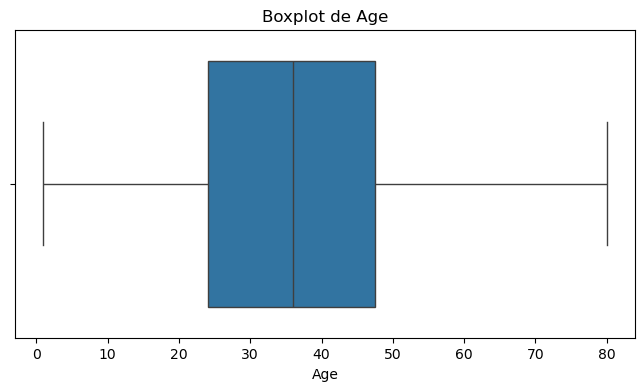

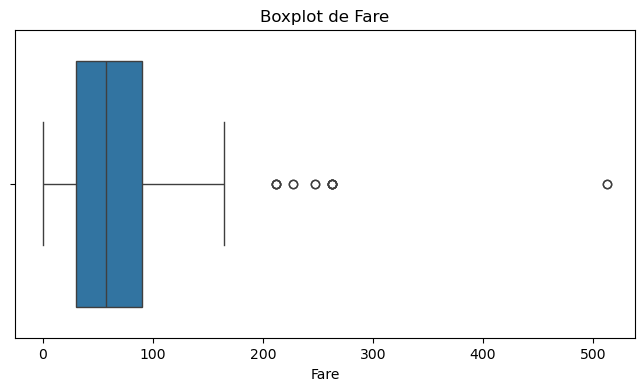

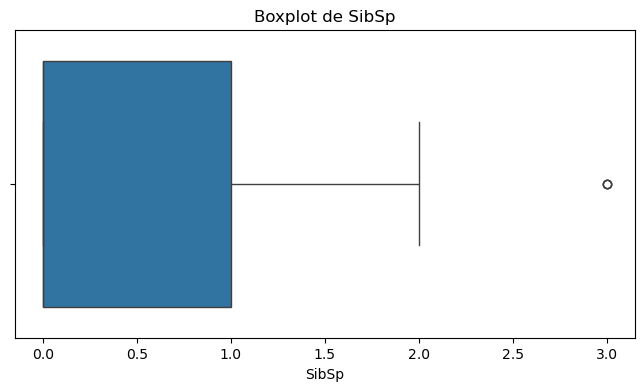

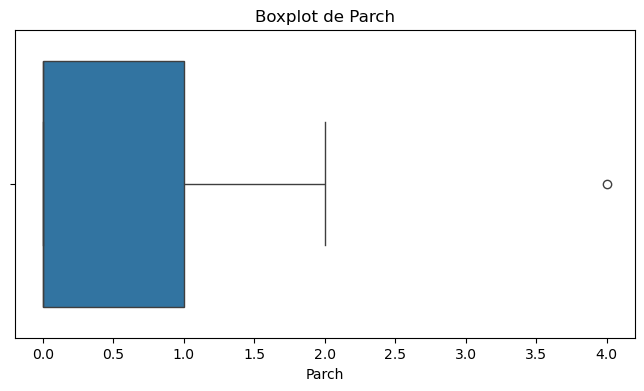

In [11]:
# Paso 6: Detección de outliers

# Gráficos de caja (boxplots) para identificar outliers
numerical_columns = ['Age', 'Fare', 'SibSp', 'Parch']

for column in numerical_columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(data=df, x=column)
    plt.title(f'Boxplot de {column}')
    plt.show()


In [12]:
# Hay valores atípicos (outliers) en los gráficos de caja (boxplots):

# 1. Fare (Tarifa): Hay varios outliers visibles, representados por pequeños círculos fuera de los bigotes del gráfico. Estos valores son 
# mucho más altos que el resto de los datos, lo que indica que algunas personas pagaron tarifas significativamente más altas que la mayoría.
    
# 2. SibSp (Número de hermanos/esposos a bordo): Se puede observar un outlier a la derecha de los bigotes, lo que indica que al menos 
# una persona tenía un número de hermanos/esposos a bordo superior al rango típico.

# 3. Parch (Número de padres/hijos a bordo): También hay un outlier visible, lo que indica que una persona tenía más padres/hijos a bordo de 
# lo habitual.
    
# Los boxplots de Age (Edad) no parecen mostrar outliers, lo que indica que la mayoría de los datos para esta variable están dentro de un rango normal.

In [13]:
# Paso 7: Convertir atributos categóricos a numéricos

from sklearn.preprocessing import OneHotEncoder, LabelEncoder

# Usamos LabelEncoder para Sex
label_encoder = LabelEncoder()
df['Sex_LabelEncoded'] = label_encoder.fit_transform(df['Sex'])

# Usamos OneHotEncoder para Embarked
df_encoded = pd.get_dummies(df, columns=['Embarked'])

print(df_encoded.head())


   PassengerId  Survived  Pclass  \
0            2         1       1   
1            4         1       1   
2            7         0       1   
3           11         1       3   
4           12         1       1   

                                                Name     Sex   Age  SibSp  \
0  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
1       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
2                            McCarthy, Mr. Timothy J    male  54.0      0   
3                    Sandstrom, Miss. Marguerite Rut  female   4.0      1   
4                           Bonnell, Miss. Elizabeth  female  58.0      0   

   Parch    Ticket     Fare Cabin  Sex_LabelEncoded  Embarked_C  Embarked_Q  \
0      0  PC 17599  71.2833   C85                 0        True       False   
1      0    113803  53.1000  C123                 0       False       False   
2      0     17463  51.8625   E46                 1       False       False   
3   

In [14]:
#¿Cuál es la mejor opción entre OneHotEncoder y LabelEncoder?

# OneHotEncoder es más adecuado para atributos sin orden jerárquico (como Embarked), mientras que LabelEncoder puede ser 
# más apropiado para atributos que tienen un sentido de orden, aunque en este caso puede inducir al modelo a pensar que hay una relación 
# ordinal entre los valores.

In [15]:
# Paso 8: Normalización y estandarización

from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Estandarización (media = 0, desviación estándar = 1)
scaler = StandardScaler()
df_standardized = scaler.fit_transform(df[['Age', 'Fare', 'SibSp', 'Parch']])

# Normalización (rango entre 0 y 1)
minmax_scaler = MinMaxScaler()
df_normalized = minmax_scaler.fit_transform(df[['Age', 'Fare', 'SibSp', 'Parch']])

# Mostramos los primeros resultados
print('Estandarización:')
print(df_standardized[:5])
print('\nNormalización:')
print(df_normalized[:5])


Estandarización:
[[ 0.14906507 -0.0971798   0.83362754 -0.63172982]
 [-0.0432295  -0.3359971   0.83362754 -0.63172982]
 [ 1.17463611 -0.35225028 -0.7230443  -0.63172982]
 [-2.03027338 -0.81407038  0.83362754  0.69708118]
 [ 1.43102886 -0.68470165 -0.7230443  -0.63172982]]

Normalización:
[[0.46889226 0.13913574 0.33333333 0.        ]
 [0.43095599 0.1036443  0.33333333 0.        ]
 [0.67121902 0.10122886 0.         0.        ]
 [0.0389479  0.03259623 0.33333333 0.25      ]
 [0.72180071 0.05182215 0.         0.        ]]


In [16]:
# ¿Qué opción es mejor, normalización o estandarización?

# Depende del algoritmo que se usará después. La estandarización es útil cuando los datos tienen distribuciones normales, mientras que 
# la normalización es más apropiada cuando queremos todos los datos en un rango específico (por ejemplo, entre 0 y 1).

In [17]:
# PARTE B
# vuelvo a hacer los imports por si queremos separar la practica en dos ipynb distintos

In [18]:
import random
import numpy as np
import pandas as pd 

# Fijar una semilla para reproducibilidad
SEED = 33
random.seed(SEED)
np.random.seed(SEED)


In [19]:
# Paso 1: Carga el dataset de MovieLens de 100K
from surprise import Dataset

# Cargar el dataset
data = Dataset.load_builtin('ml-100k')

In [20]:
# Paso 2: Divide el dataset en una partición simple
from surprise.model_selection import train_test_split

# Dividir en conjunto de entrenamiento (75%) y evaluación (25%)
trainset, testset = train_test_split(data, test_size=0.25, random_state=SEED)


In [21]:
# Paso 3: Evaluar distintos algoritmos

# A:  Basado en vecinos
from surprise import KNNBasic

    # A1: Basado en usuarios
sim_options_user = {'name': 'pearson', 'user_based': True}
algo_knn_user = KNNBasic(sim_options=sim_options_user)
algo_knn_user.fit(trainset)


    # A2: Basado en productos
sim_options_producto = {'name': 'pearson', 'user_based': False}
algo_knn_producto = KNNBasic(sim_options=sim_options_producto)
algo_knn_producto.fit(trainset)

# B:  Basado en factorizacion de matrices
from surprise import SVD, NMF

    # B1: SVD
algo_svd = SVD(random_state=SEED)
algo_svd.fit(trainset)

    # B2: NMF
algo_nmf = NMF(random_state=SEED)
algo_nmf.fit(trainset)

Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.


In [22]:
# Paso 5: Obtener predicciones

def calcular_diferencia_top5(predicciones):
    r_ui_vals = np.array([pred.r_ui for pred in predicciones[:5]])  # Ratings reales
    est_vals = np.array([pred.est for pred in predicciones[:5]])    # Ratings estimados
    return np.sum(np.abs(r_ui_vals - est_vals))  # Suma de errores absolutos


pred_knn_user = algo_knn_user.test(testset)
pred_knn_producto = algo_knn_producto.test(testset)
pred_svd = algo_svd.test(testset)
pred_nmf = algo_nmf.test(testset)

# Ejemplo: mostrar 5 predicciones del modelo knn_usuario
print("Ejemplo de 5 predicciones del modelo knn_usuario:")
for pred in pred_knn_user[:5]:
    print(pred)
print(f"Diferencia total de los 5 mostrados (knn_usuario): {calcular_diferencia_top5(pred_knn_user):.4f}\n")

# Ejemplo: mostrar 5 predicciones del modelo knn_producto
print("Ejemplo de 5 predicciones del modelo knn_producto:")
for pred in pred_knn_producto[:5]:
    print(pred)
print(f"Diferencia total de los 5 mostrados (knn_producto): {calcular_diferencia_top5(pred_knn_producto):.4f}\n")

# Ejemplo: mostrar 5 predicciones del modelo SVD
print("Ejemplo de 5 predicciones del modelo SVD:")
for pred in pred_svd[:5]:
    print(pred)
print(f"Diferencia total de los 5 mostrados (SVD): {calcular_diferencia_top5(pred_svd):.4f}\n")

# Ejemplo: mostrar 5 predicciones del modelo NMF
print("Ejemplo de 5 predicciones del modelo NMF:")
for pred in pred_nmf[:5]:
    print(pred)
print(f"Diferencia total de los 5 mostrados (NMF): {calcular_diferencia_top5(pred_nmf):.4f}\n")


Ejemplo de 5 predicciones del modelo knn_usuario:
user: 655        item: 919        r_ui = 2.00   est = 3.92   {'actual_k': 40, 'was_impossible': False}
user: 665        item: 660        r_ui = 4.00   est = 3.66   {'actual_k': 40, 'was_impossible': False}
user: 435        item: 571        r_ui = 2.00   est = 2.31   {'actual_k': 20, 'was_impossible': False}
user: 318        item: 196        r_ui = 3.00   est = 3.99   {'actual_k': 40, 'was_impossible': False}
user: 524        item: 1456       r_ui = 3.00   est = 3.97   {'actual_k': 4, 'was_impossible': False}
Diferencia total de los 5 mostrados (knn_usuario): 4.5303

Ejemplo de 5 predicciones del modelo knn_producto:
user: 655        item: 919        r_ui = 2.00   est = 2.94   {'actual_k': 40, 'was_impossible': False}
user: 665        item: 660        r_ui = 4.00   est = 3.30   {'actual_k': 40, 'was_impossible': False}
user: 435        item: 571        r_ui = 2.00   est = 2.84   {'actual_k': 40, 'was_impossible': False}
user: 318        

En los modelos knn aparece el valor actual_k que significa la cantidad de vecinos que ha utilizado para hacer la parediccion y el was_imposible dice si ha sido posible realizar la prediccion, en los modelos knn puede deberse a que no tenga vecinos.

Se puede ver que los modelos SVD y NMF dan mejores resultados, es decir que tienen una predicciones mas acertadas. Entre los modelos knn suelen tener mejores resultados el basado en productos.
Estas observaciones son para solo los 5 elementos, si se evaluan todos quizas tengan valores distintos aun que seguramente no sean muy distintos los resultados

In [23]:
# Paso 6: Tabla métricas

from surprise import accuracy
import numpy as np
from sklearn.metrics import precision_score, recall_score, ndcg_score

# Calcular RMSE
rmse_knn_user = accuracy.rmse(pred_knn_user, verbose=False)
rmse_knn_producto = accuracy.rmse(pred_knn_producto, verbose=False)
rmse_svd = accuracy.rmse(pred_svd, verbose=False)
rmse_nmf = accuracy.rmse(pred_nmf, verbose=False)

print(f"RMSE knn_usuario {rmse_knn_user:.4f}")
print(f"RMSE knn_producto {rmse_knn_producto:.4f}")
print(f"RMSE SVD {rmse_svd:.4f}")
print(f"RMSE NMF {rmse_nmf:.4f}\n")

def compute_topk_metrics(predictions, k=10):
    user_est_true = {}

    # Agrupar predicciones por usuario
    for pred in predictions:
        uid = pred.uid
        if uid not in user_est_true:
            user_est_true[uid] = []
        user_est_true[uid].append((pred.r_ui, pred.est))
    
    precisions, recalls, ndcgs = [], [], []
    
    for user_preds in user_est_true.values():
        # Ordenar por la predicción estimada
        user_preds.sort(key=lambda x: x[1], reverse=True)

        # Relevancia real: 1 si rating real > 4, 0 en otro caso
        true_relevance = [1 if r > 4 else 0 for r, _ in user_preds]
        est_scores = [est for _, est in user_preds]

        # Vector binario de predicciones: 1 en top-k, 0 en el resto
        pred_binary = [1 if i < k else 0 for i in range(len(user_preds))]

        # Cálculo de métricas
        if sum(true_relevance) > 0:  # Evitar división por 0
            prec = precision_score(true_relevance, pred_binary, zero_division=0)
            rec = recall_score(true_relevance, pred_binary, zero_division=0)
        else:
            prec, rec = 0, 0

        # Calcular NDCG correctamente
        if len(true_relevance) > 1 and len(est_scores) > 1:
            ndcg = ndcg_score([true_relevance], [est_scores], k=k)  # Pasa como listas anidadas
        else:
            ndcg = 0  # Evita errores si hay menos de 2 elementos

        precisions.append(prec)
        recalls.append(rec)
        ndcgs.append(ndcg)
    
    return np.mean(precisions), np.mean(recalls), np.mean(ndcgs)

# Calcular métricas top-k para cada modelo
prec_knn_user, rec_knn_user, ndcg_knn_user = compute_topk_metrics(pred_knn_user, k=10)
prec_knn_producto, rec_knn_producto, ndcg_knn_producto = compute_topk_metrics(pred_knn_producto, k=10)
prec_svd, rec_svd, ndcg_svd = compute_topk_metrics(pred_svd, k=10)
prec_nmf, rec_nmf, ndcg_nmf = compute_topk_metrics(pred_nmf, k=10)

# Crear un DataFrame para mostrar los resultados
results = pd.DataFrame({
    'Modelo': ['KNN_Usuario', 'KNN_Producto', 'SVD', 'NMF'],
    'RMSE': [rmse_knn_user, rmse_knn_producto, rmse_svd, rmse_nmf],
    'Precision@10': [prec_knn_user, prec_knn_producto, prec_svd, prec_nmf],
    'Recall@10': [rec_knn_user, rec_knn_producto, rec_svd, rec_nmf],
    'NDCG@10': [ndcg_knn_user, ndcg_knn_producto, ndcg_svd, ndcg_nmf]
})

print(results)



RMSE knn_usuario 1.0101
RMSE knn_producto 1.0404
RMSE SVD 0.9347
RMSE NMF 0.9611

         Modelo      RMSE  Precision@10  Recall@10   NDCG@10
0   KNN_Usuario  1.010051      0.323181   0.624450  0.547580
1  KNN_Producto  1.040405      0.270371   0.557531  0.437946
2           SVD  0.934743      0.320424   0.617265  0.534246
3           NMF  0.961117      0.310562   0.604995  0.516157


RMSE es el error promedio
SVD  (0.934743) tiene el menor RMSE, lo que indica que sus predicciones están más cerca de los valores reales en promedio.

Precision la proporcion de los recomendados realmente relevantes (cuyo rating sea superior a 4) y dice cuantas de las de los positivos son reales
KNN-Usuario (0.323181) y SVD (0.320424) tienen la mejor precisión, lo que indica que cuando recomienda algo, es más probable que sea relevante.

Recall cuantos de los positivos los marco como negativos (FN)
KNN-Usuario (0.6245) y SVD (0.6173) tienen el mejor recall, lo que significa que capturan la mayor cantidad de productos relevantes en su top-10.

NDCG (Normalized Discounted Cumulative Gain) Evalúa la calidad del ordenamiento de las recomendaciones
KNN-Usuario (0.547580) y SVD (0.547580) tienen la mejor calidad de ranking, lo que indica que no solo recomiendan bien, sino que posicionan mejor los productos relevantes en los primeros lugares

El mejor modelo en general es SVD, ya que tiene el menor RMSE, una alta precisión y recall y un buen NDCG.
KNN-Usuario también es bastante bueno, con la mejor precisión y recall, pero con un RMSE un poco más alto (peor).
NMF no destaca en nada
KNN-Producto seria el peor de los evaluados.